# Simple Linear Regression Model with Single Features

## 1.Packages


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split

## 2. Problem Statement


    Key Components:

    a. Feature: Hours Studied (numerical, ranging from 1 to 10 hours)
    b. Target Variable: Exam Score (numerical, ranging from 65 to 99)
    c. Model: Linear Regression
    d. Objective: Accurately predict exam scores based on hours studied

## 3. DataSet
Loading the Dataset for the task

    a. We will use 'dataset' for this task
    b. X is 'Hours Studied'
    c. y is 'Exam Score'

In [119]:
dataset = pd.read_csv("dataset.csv")

In [120]:
print("Shape of the dataset: ", dataset.shape)
print("Data type of the dataset: ", type(dataset))

Shape of the dataset:  (69, 2)
Data type of the dataset:  <class 'pandas.core.frame.DataFrame'>


In [121]:
X = dataset['Hours Studied']
y = dataset['Exam Score']

In [122]:
X.head(), y.head()

(0    1.0
 1    2.0
 2    3.0
 3    4.0
 4    5.0
 Name: Hours Studied, dtype: float64,
 0    65
 1    70
 2    75
 3    80
 4    85
 Name: Exam Score, dtype: int64)

### Vizualizing the dataset

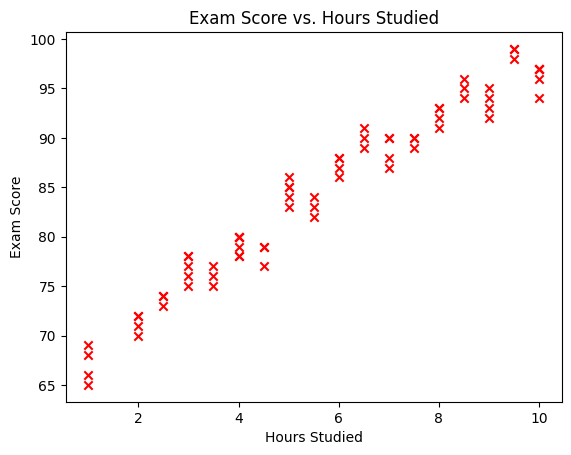

In [123]:
plt.scatter(X, y, marker='x', c='r') 

# Set the title
plt.title("Exam Score vs. Hours Studied")
# Set the y-axis label
plt.ylabel('Exam Score')
# Set the x-axis label
plt.xlabel('Hours Studied')
plt.show()

## 4. Building a Model

Linear Regression Model with one input feature ('Hours Studied') and target ('Exam Scores')

### 4.1 Computing Cost

We use Squared Error Cost Function to calculate cost: Cost simply refers to the accuracy of the model/ difference of predicted value from real value

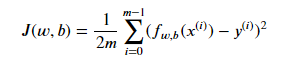


For linear regression with one feature, the prediction model i as:

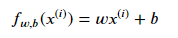

In [124]:
def cost_function(X, y, w, b):
    m = len(X)
    sum_value = 0

    for i in range(len(X)):
        model_value = w*X[i]+b
        inter_value = (model_value - y[i])**2

        sum_value += inter_value
    
    total_cost = sum_value/(2*m)

    return total_cost

### 4.2 Computing Gradient Descent

Gradient Descent Algorithm is:

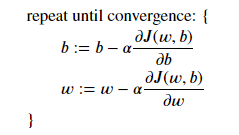

Where, parameters w and b are updated simultaniously

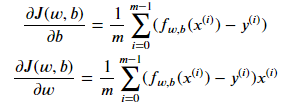

#### Derivative of J(w,b) w.r.t w and b

In [125]:
# Returns Derivates of J w.r.t w and b
def deri(X, y, w, b):
    m = len(X)
    sum_value_w = 0
    sum_value_b = 0

    for i in range(len(X)):
        model_value = w*X[i]+b
        inter_value_w = (model_value - y[i])*X[i]
        inter_value_b = (model_value - y[i])

        sum_value_w += inter_value_w
        sum_value_b += inter_value_b
    
    dw_dj = sum_value_w/m
    db_dj = sum_value_b/m

    return dw_dj,db_dj

#### Applying Batch Gradient Descent based on the Derivative and Cost

This gives the optimal value of w, b for the model

In [126]:
def gradient_descent(X, y, w, b, alpha, num_iters):

   # TO store history of Cost(J) and w for graphing 
   J_history = []
   w_history = []

   for i in range(num_iters): 
      dw,db = deri(X, y, w, b)
      w = w - alpha * dw
      b = b - alpha * db

      # Save Cost J at each iteration
      if i < 100000: # prevent resource exhaustion
         cost = cost_function(X, y, w, b)
         J_history.append(cost)
      
      # Printing Cost J at certain intervals
      if i%math.ceil(num_iters/10) == 0:
         w_history.append(w)
         print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

   return w,b, J_history, w_history

### 4.3 Inserting values into the model and Expected Output

In [127]:
initial_w = 0
initial_b = 0
learning_rate = 0.01
num_iters = 5000

cost = cost_function(X,y,initial_w,initial_b)
print("Initial Cost: ",cost)

dw,db = deri(X,y,initial_w,initial_b)
print("Initial Derivative, dw_dj: ", dw)
print("Initial Derivative, db_dj: ", db)

w,b,_,_ = gradient_descent(X,y,initial_w,initial_b,learning_rate, num_iters)
print("w: ",w)
print("b: ",b)

cost = cost_function(X,y,w,b)
print("Cost: ",cost)

Initial Cost:  3592.985507246377
Initial Derivative, dw_dj:  -499.9492753623188
Initial Derivative, db_dj:  -84.28985507246377
Iteration    0: Cost  1534.93


Iteration  500: Cost    63.64
Iteration 1000: Cost    12.11
Iteration 1500: Cost     3.48
Iteration 2000: Cost     2.04
Iteration 2500: Cost     1.80
Iteration 3000: Cost     1.76
Iteration 3500: Cost     1.75
Iteration 4000: Cost     1.75
Iteration 4500: Cost     1.75
w:  3.303259657369504
b:  65.61776143659532
Cost:  1.7498613017764564


## 5. Plotting the predicted values to see linear fit

In [128]:
m = X.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X[i] + b

Text(0.5, 0, 'Hours Studied')

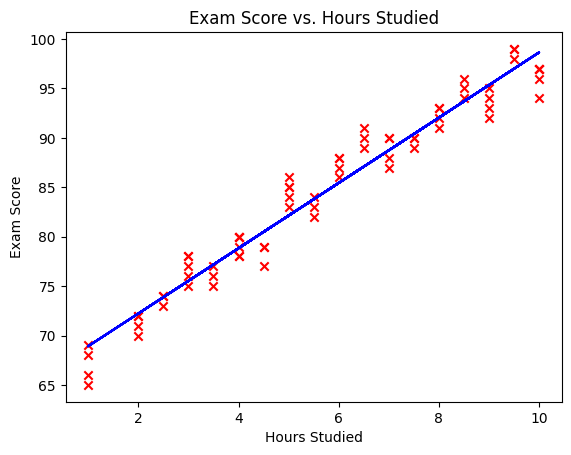

In [129]:
# plot a liner line
plt.plot(X, predicted, c="b" )

# Create Scatter Plot
plt.scatter(X,y, marker="x", c="r")

plt.title("Exam Score vs. Hours Studied")
plt.ylabel("Exam Score")
plt.xlabel("Hours Studied")

## 6. Making Prediction for a new data

In [132]:
predict_1 = w * 9 + b
print("9 hours of study can get you an estimated exam score of: ", predict_1)

predict_2 = w * 0.5 + b
print("half an hour of study can get you an estimated exam score of: ", predict_2)

9 hours of study can get you an estimated exam score of:  95.34709835292085
half an hour of study can get you an estimated exam score of:  67.26939126528006
